In [1]:
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
from matplotlib.pylab import rcParams
%matplotlib inline

import statsmodels.api as sm

#### 日経平均の時系列データを読み込み（終値ベース）

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
df = pd.read_csv('./data/n225_2014_2018.csv', index_col='Date', date_parser=dateparse, dtype='float')
ts = df['Close'] 

#### とりあえずプロット

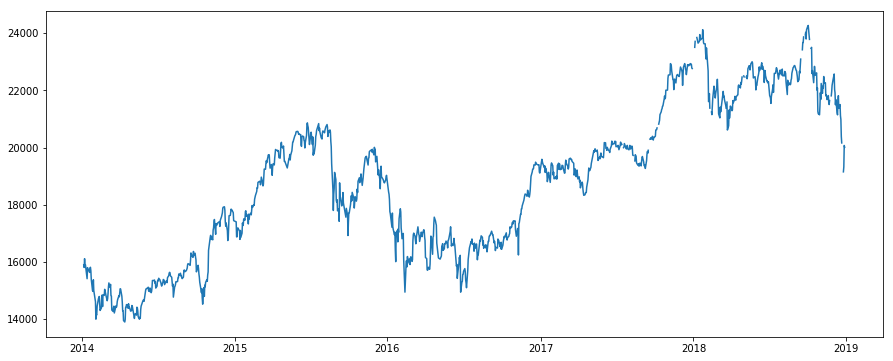

In [3]:
rcParams['figure.figsize'] = 15, 6
plt.plot(ts) # 祝日のデータが飛んでいる レコード落としてもいいけど、とりあえず残す

#### ローカル線形トレンドモデル（カルマンフィルタ）
---

収束できないって言われているけれど、とりあえず放置

c:\users\bell\desktop\python\anomaly\py36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


         Current function value: 6.877294
         Iterations: 50
         Function evaluations: 81
         Gradient evaluations: 81
                        Unobserved Components Results                         
Dep. Variable:                  Close   No. Observations:                 1246
Model:             local linear trend   Log Likelihood               -8569.108
Date:                Thu, 14 Mar 2019   AIC                          17144.215
Time:                        01:01:23   BIC                          17159.594
Sample:                             0   HQIC                         17149.998
                               - 1246                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular  2.165e+04   1907.470     11.352      0.000    

c:\users\bell\desktop\python\anomaly\py36\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


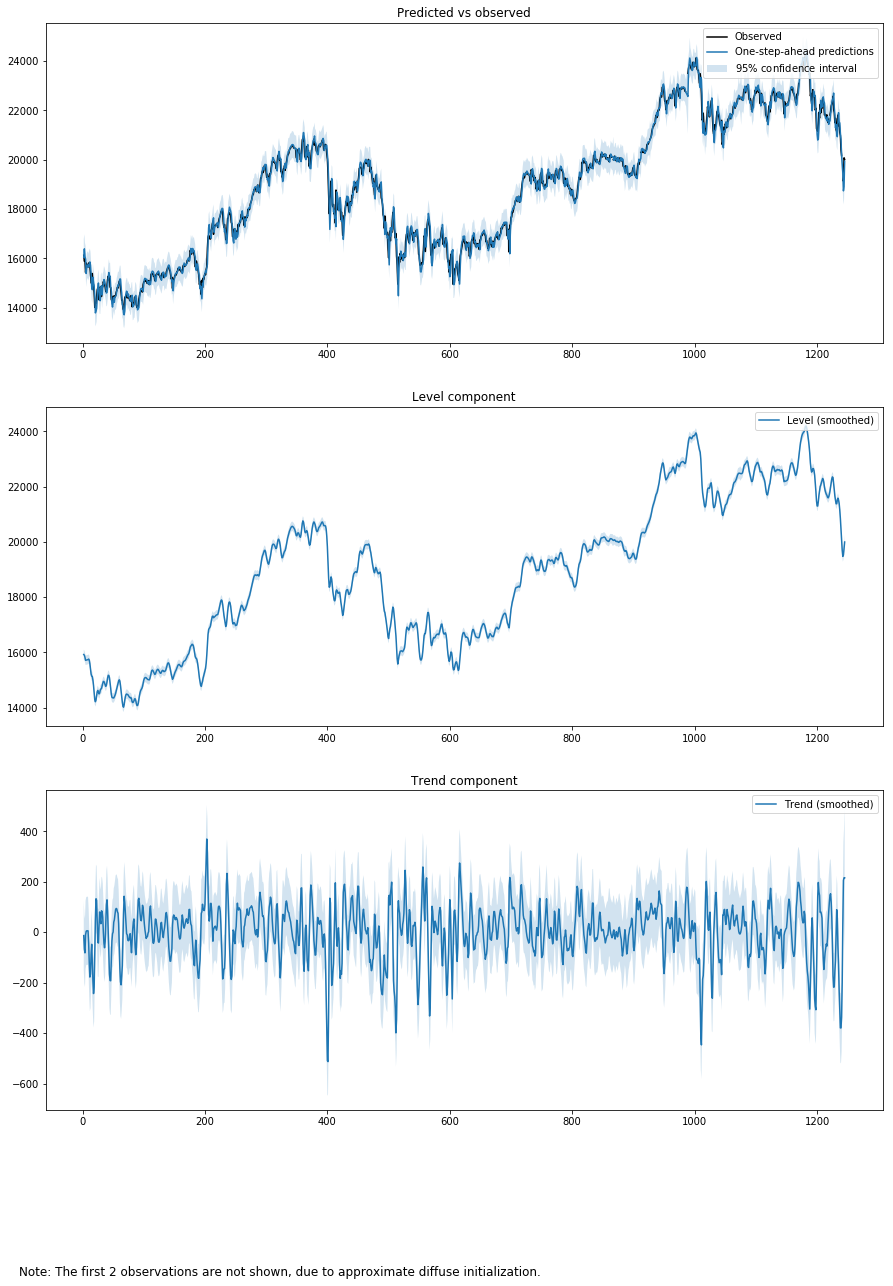

In [4]:
# ローカル線形トレンドモデル
model = sm.tsa.UnobservedComponents(
    ts,
    'local linear trend'
)

# パラメータの推定
res = model.fit(method='bfgs')

# 推定値を表示
print(res.summary())

# 推定値を表示
rcParams['figure.figsize'] = 15, 20
fig = res.plot_components()

#### 最初の600時点を捨て、期間を絞る
---

最初の山を無くせば、結果が少し変わるかも？

In [5]:
ts_2 = ts[600:]

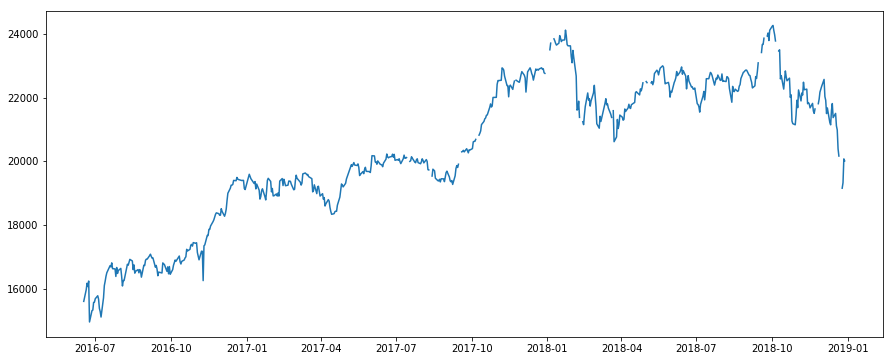

In [6]:
rcParams['figure.figsize'] = 15, 6
plt.plot(ts_2)

#### ローカル線形トレンドモデル（部分時系列版）

c:\users\bell\desktop\python\anomaly\py36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Optimization terminated successfully.
         Current function value: 6.702759
         Iterations: 38
         Function evaluations: 62
         Gradient evaluations: 62
                        Unobserved Components Results                         
Dep. Variable:                  Close   No. Observations:                  646
Model:             local linear trend   Log Likelihood               -4329.983
Date:                Thu, 14 Mar 2019   AIC                           8665.965
Time:                        01:01:31   BIC                           8679.368
Sample:                             0   HQIC                          8671.166
                                - 646                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular  1.843e+0

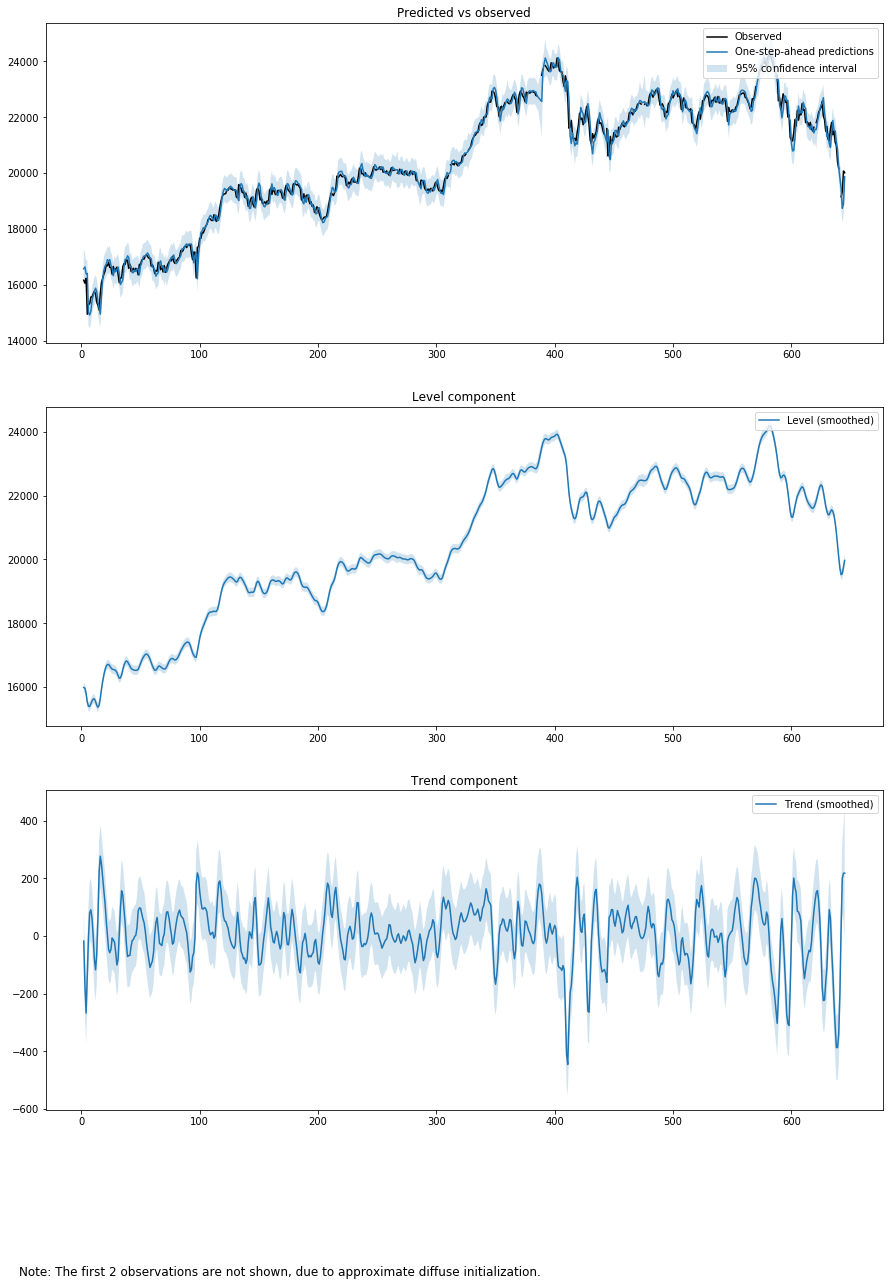

In [7]:
# ローカル線形トレンドモデル
model_2 = sm.tsa.UnobservedComponents(
    ts_2,
    'local linear trend'
)

# パラメータの推定
res_2 = model_2.fit(method='bfgs')

# 推定値を表示
print(res_2.summary())

# 推定値を表示
rcParams['figure.figsize'] = 15, 20
fig = res_2.plot_components()

#### トレンド項を比較する

In [8]:
len(res_2.trend.smoothed)

646

In [9]:
pad = np.zeros(600)
pad[:] = np.nan

In [10]:
# 長さが違うので、足りない分だけ期間絞った版を0埋めして整形
graph = pd.DataFrame()
graph['Date'] = df.index
graph['all_term_trend'] = res.trend.smoothed
graph['p_term_trend'] = np.concatenate([pad, res_2.trend.smoothed])
graph = graph.set_index(keys='Date', drop=True)

#### 学習データに用いた期間の違いによって、トレンドの推定値がわずかにずれてる
---

むしろ、ほとんどずれていない  
もう少しずれるかと思った

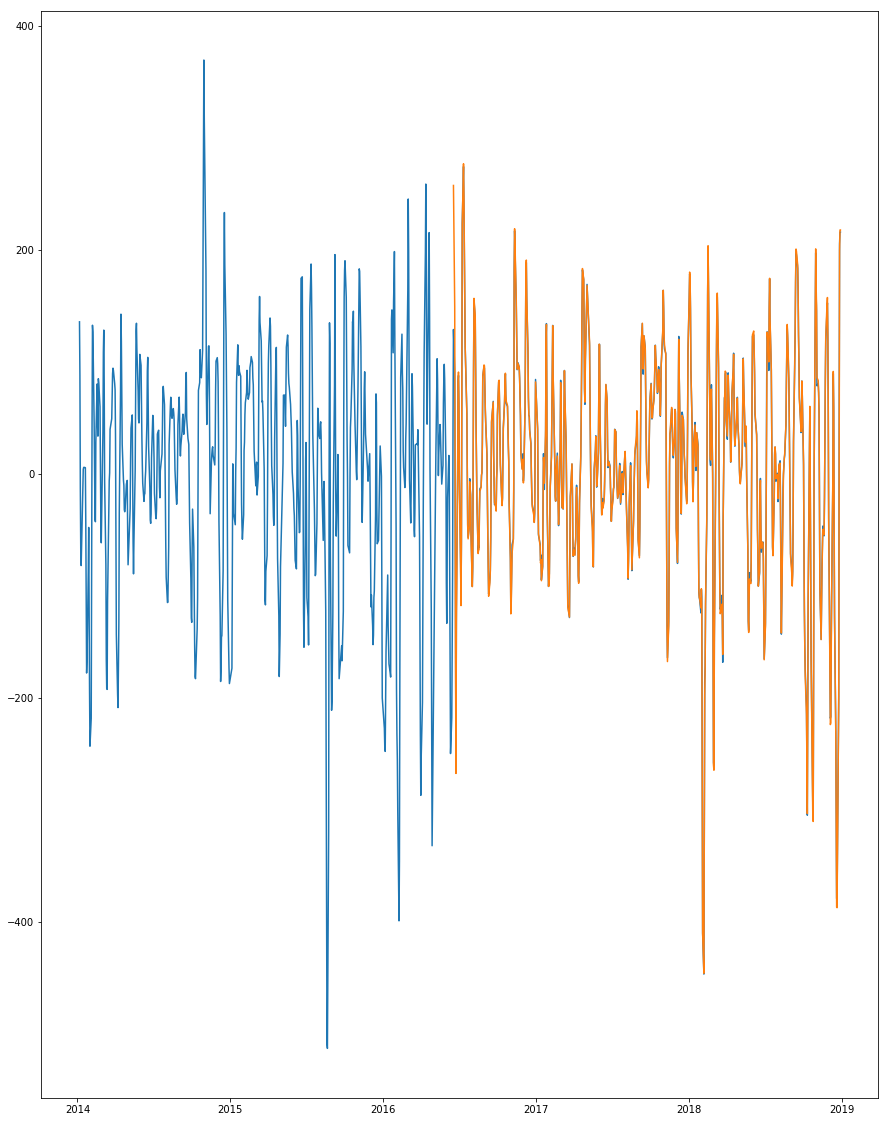

In [11]:
plt.plot(graph)